# Dataset

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's load data for classification. We will try to predict patient mortality for kidney cancer patients.

In [2]:
dataset = np.load('dataset.npy')

In [3]:
print(f'Dataset shape: {dataset.shape}')
print(dataset[:10])

Dataset shape: (300, 3)
[[6.49671415 5.8617357  1.        ]
 [6.64768854 7.52302986 1.        ]
 [5.76584663 5.76586304 0.        ]
 [7.57921282 6.76743473 1.        ]
 [5.53052561 6.54256004 0.        ]
 [5.53658231 5.53427025 0.        ]
 [6.24196227 4.08671976 1.        ]
 [4.27508217 5.43771247 0.        ]
 [4.98716888 6.31424733 0.        ]
 [5.09197592 4.5876963  0.        ]]


The first column represents the tumor diameter, the second one represents the kidney diameter, and the last one represents the outcome after 5 years, with 1=death, 0=no death.

Similarly to the first lab, the data for this lab is actually generated as it is easier for now. I promise we will start using "real" data really soon.

**Important:** some of the questions / tasks are deliberately slightly ambiguous. Do not hesitate to ask if you are unsure about something.

**Split the dataset into training, validation and testing sets. You can use the** sklearn.model_selection.train_test_split **function (but you don't have to).**

**Detach the target variable from the input variables.**

In [4]:
X = dataset[:,:2]
y = dataset[:,2]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(160, 2)
(80, 2)
(60, 2)


In [8]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

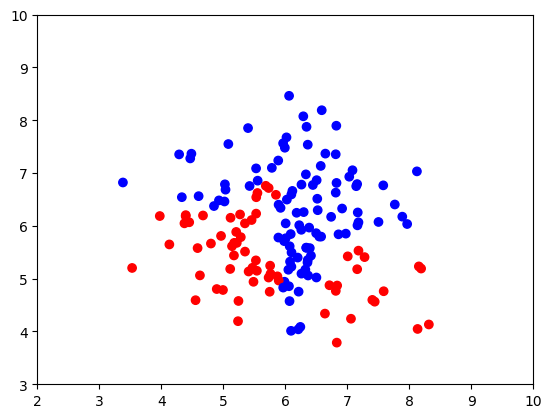

In [9]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=cm_bright)
plt.xlim([2,10])
plt.ylim([3,10])
plt.show()

# Logistic regression

**Train a first linear <ins>classification</ins> model. You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn).**

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg = LogisticRegression(C=1e16, solver='lbfgs') # no regularization for now

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16)

**What is the score?** (by "score", I mean "accuracy" here, i.e. the fraction of correct predictions).

In [13]:
logreg.score(X_test, y_test)

0.7666666666666667

**Now let's add some non-linearity. Hint: the class** sklearn.preprocessing.PolynomialFeatures **may come in handy.**

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2)

In [16]:
print(X_train.shape)
print(poly.fit_transform(X_train).shape)

(160, 2)
(160, 6)


**What are the hyperparameters here?**

*The degree of the polynomial as well as the 'C' coefficients weighting the regularization in the logistic regression model.*

**What is the classification score with the non linear approach?**

In [17]:
degrees = [1, 2, 3, 4, 5]
Cs = [1e-6, 1e-3, 1, 1e3, 1e6]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    for c in Cs:
        logreg = LogisticRegression(C=c, fit_intercept=False, solver='lbfgs', max_iter=5000)
        logreg.fit(X_train_poly, y_train)
        score = logreg.score(X_val_poly, y_val)
        print('Score with d={} and C={}: {}'.format(d, c, score))

Score with d=1 and C=1e-06: 0.575
Score with d=1 and C=0.001: 0.575
Score with d=1 and C=1: 0.6625
Score with d=1 and C=1000.0: 0.7625
Score with d=1 and C=1000000.0: 0.7625
Score with d=2 and C=1e-06: 0.575
Score with d=2 and C=0.001: 0.6
Score with d=2 and C=1: 0.7625
Score with d=2 and C=1000.0: 0.8
Score with d=2 and C=1000000.0: 0.8
Score with d=3 and C=1e-06: 0.575
Score with d=3 and C=0.001: 0.725
Score with d=3 and C=1: 0.8375
Score with d=3 and C=1000.0: 0.875
Score with d=3 and C=1000000.0: 0.8875
Score with d=4 and C=1e-06: 0.6
Score with d=4 and C=0.001: 0.85
Score with d=4 and C=1: 0.8625
Score with d=4 and C=1000.0: 0.9125
Score with d=4 and C=1000000.0: 0.9125
Score with d=5 and C=1e-06: 0.775
Score with d=5 and C=0.001: 0.8875
Score with d=5 and C=1: 0.9375
Score with d=5 and C=1000.0: 0.975
Score with d=5 and C=1000000.0: 0.975


*Best score seems to be with degree 5 and C=1000.*

In [19]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
logreg = LogisticRegression(C=1000, solver='lbfgs', max_iter=5000, fit_intercept=False)
logreg.fit(X_train_poly, y_train)

LogisticRegression(C=1000, fit_intercept=False, max_iter=5000)

In [20]:
X_test_poly = poly.fit_transform(X_test)
score = logreg.score(X_test_poly, y_test)
score

0.95

*The actual value of the score is not very important here, I could obtain very different scores by simply splitting the dataset into train / val / test with different random states. Updating scikit-learn in my environment also changed the score. Since there are few samples, the estimated score is quite noisy.* 

**Have you been rigorous with the selection of <ins>all</ins> the hyper-parameters? Briefly explain how.**

*Yes, I selected the values of the two hyperparameters using the validation set.*

**What are the accuracies and losses on the training, validation and testing sets? How do you interpret this?**

In [21]:
from sklearn.metrics import log_loss

In [22]:
X_val_poly = poly.fit_transform(X_val)

In [23]:
# Losses
print('Train loss: {}'.format(log_loss(y_train, logreg.predict_proba(X_train_poly))))
print('Val loss: {}'.format(log_loss(y_val, logreg.predict_proba(X_val_poly))))
print('Test loss: {}'.format(log_loss(y_test, logreg.predict_proba(X_test_poly))))

Train loss: 0.08613962979023035
Val loss: 0.527849676554279
Test loss: 0.43295355475430986


In [24]:
# Losses
print('Train accuracy: {}'.format(logreg.score(X_train_poly, y_train)))
print('Val accuracy: {}'.format(logreg.score(X_val_poly, y_val)))
print('Test accuracy: {}'.format(logreg.score(X_test_poly, y_test)))

Train accuracy: 0.9625
Val accuracy: 0.975
Test accuracy: 0.95


*The accuracies and losses are close to each other on the train, val and test sets, so we are not overfitting.*